<img src="https://camo.githubusercontent.com/d61800e0293a2d29f1b65dd9284c0bc60d89fb98eca567ccfc9c34fd5d620119/68747470733a2f2f7777772e746865737061726b73666f756e646174696f6e73696e6761706f72652e6f72672f696d616765732f6c6f676f5f736d616c6c2e706e67" align="center">

# Task #3 -  Exploratory Data Analysis - Retail

## By - <i>Abhinav Mehrotra</i>

## Objectives:- 

1. Perform Exploratory Data Analysis on 'SampleSuperStore' dataset.
2. Find out weak areas where you can work to make profit.
3. Derive business problems by exploring the data.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')

In [2]:
data = pd.read_csv("SampleSuperstore.csv")

---
---

# Exploratory Data Analysis (EDA)

### What are the Total Sales and Total Profit of the Company?

In [3]:
print("The Total Sales of the Company:", round(data['Sales'].sum(),2), "USD")

The Total Sales of the Company: 2297200.86 USD


In [4]:
print("The Total Profits of the Company:", round(data['Profit'].sum(),2), "USD")

The Total Profits of the Company: 286397.02 USD


---
### States with Highest/Lowest Sales & Profits

In [5]:
by_state = data.groupby('State').sum()

In [6]:
highest_sales_by_state = by_state['Sales'].sort_values(ascending=False).head()
lowest_sales_by_state = by_state['Sales'].sort_values().head()
highest_profits_by_state = by_state['Profit'].sort_values(ascending=False).head()
lowest_profits_by_state = by_state['Profit'].sort_values().head()

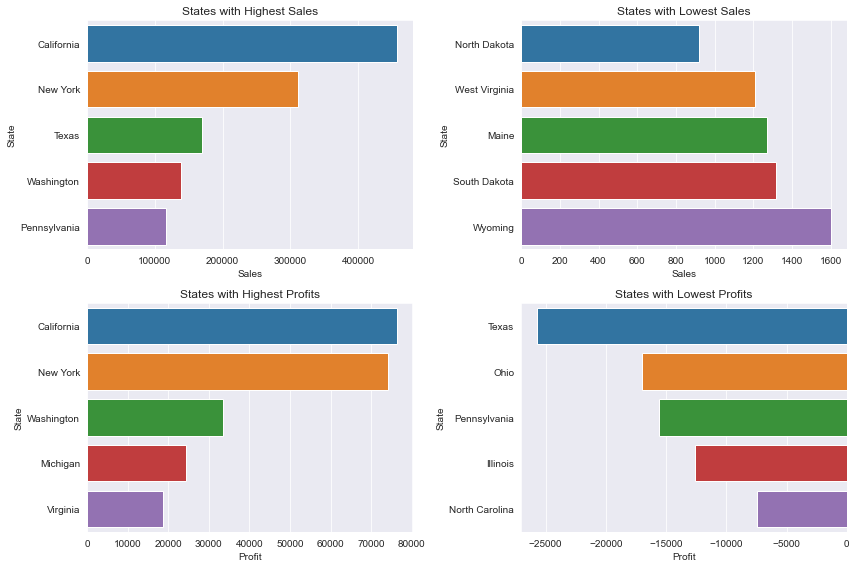

In [7]:
fig,axes = plt.subplots(nrows=2,ncols=2,figsize=(12,8))
sns.barplot(y=highest_sales_by_state.index,x=highest_sales_by_state.values,ax=axes[0,0])
axes[0,0].set_title('States with Highest Sales')
axes[0,0].set_xlabel('Sales')
sns.barplot(y=lowest_sales_by_state.index,x=lowest_sales_by_state.values,ax=axes[0,1])
axes[0,1].set_title('States with Lowest Sales')
axes[0,1].set_xlabel('Sales')
sns.barplot(y=highest_profits_by_state.index,x=highest_profits_by_state.values,ax=axes[1,0])
axes[1,0].set_title('States with Highest Profits')
axes[1,0].set_xlabel('Profit')
sns.barplot(y=lowest_profits_by_state.index,x=lowest_profits_by_state.values,ax=axes[1,1])
axes[1,1].set_title('States with Lowest Profits')
axes[1,1].set_xlabel('Profit')
plt.tight_layout()
plt.show()

**States with Highest Sales:-** California, New York, Texas

**States with Lowest Sales:-** North Dakota, West Virginia, Maine

**States with Highest Profits:-** California, New York, Washington

**States with Lowest Profits:-** Texas, Ohio, Pennsylvania

---
### Cities with Highest/Lowest Sales & Profits

In [8]:
by_city = data.groupby('City').sum()

In [9]:
highest_sales_by_city = by_city['Sales'].sort_values(ascending=False).head(10)
lowest_sales_by_city = by_city['Sales'].sort_values().head(10)
highest_profits_by_city = by_city['Profit'].sort_values(ascending=False).head(10)
lowest_profits_by_city = by_city['Profit'].sort_values().head(10)

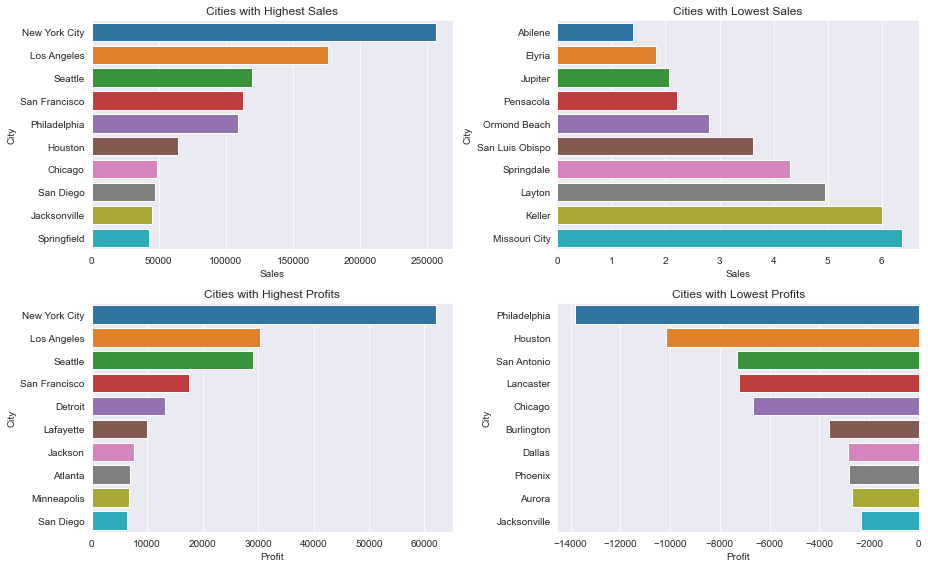

In [10]:
fig,axes = plt.subplots(nrows=2,ncols=2,figsize=(13,8))
sns.barplot(y=highest_sales_by_city.index,x=highest_sales_by_city.values,ax=axes[0,0])
axes[0,0].set_title('Cities with Highest Sales')
axes[0,0].set_xlabel('Sales')
sns.barplot(y=lowest_sales_by_city.index,x=lowest_sales_by_city.values,ax=axes[0,1])
axes[0,1].set_title('Cities with Lowest Sales')
axes[0,1].set_xlabel('Sales')
sns.barplot(y=highest_profits_by_city.index,x=highest_profits_by_city.values,ax=axes[1,0])
axes[1,0].set_title('Cities with Highest Profits')
axes[1,0].set_xlabel('Profit')
sns.barplot(y=lowest_profits_by_city.index,x=lowest_profits_by_city.values,ax=axes[1,1])
axes[1,1].set_title('Cities with Lowest Profits')
axes[1,1].set_xlabel('Profit')
plt.tight_layout()
plt.show()

**Cities with Highest Sales:-** New York City, Los Angeles, Seattle

**Cities with Lowest Sales:-** Abilene, Elyria, Jupiter

**Cities with Highest Profits:-** New York City, Los Angeles, Seattle

**Cities with Lowest Profits:-** Philadelphia, Houston, San Antonio

---
### Analysis by Segment

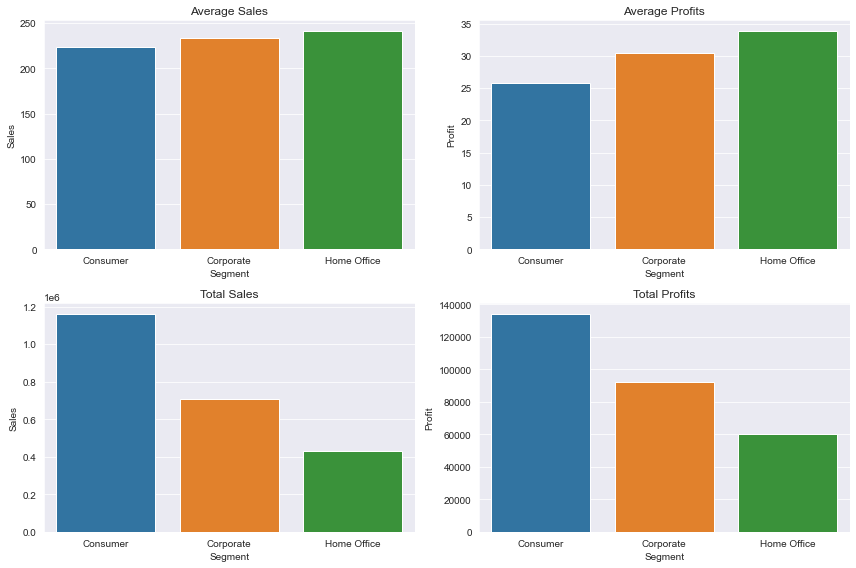

In [11]:
fig,axes = plt.subplots(nrows=2,ncols=2,figsize=(12,8))
sns.barplot(x='Segment',y='Sales',data=data,ax=axes[0,0],ci=None)
axes[0,0].set_title('Average Sales')
sns.barplot(x='Segment',y='Profit',data=data,ax=axes[0,1],ci=None)
axes[0,1].set_title('Average Profits')
sns.barplot(x='Segment',y='Sales',data=data,ax=axes[1,0],ci=None,estimator=sum)
axes[1,0].set_title('Total Sales')
sns.barplot(x='Segment',y='Profit',data=data,ax=axes[1,1],ci=None,estimator=sum)
axes[1,1].set_title('Total Profits')
plt.tight_layout()
plt.show()

**Insight:-**
Even though the total sales and profit in Consumer segment is large, the average sales and profit are lowest in this segment.

---
### Analysis on Discount

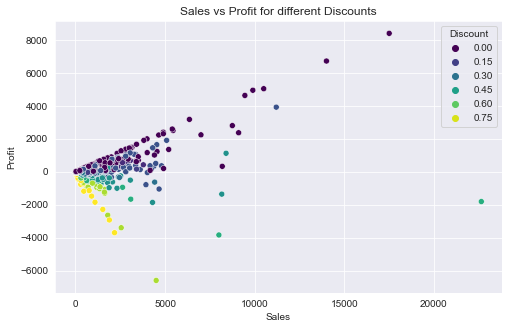

In [12]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='Sales',y='Profit',data=data,hue='Discount',palette='viridis')
plt.title('Sales vs Profit for different Discounts')
plt.show()

By the initial peek, it looks like that the Profit tends to rise for low/no discount, and decrease for high discounts.

- Pairplot for Numerical columns:-

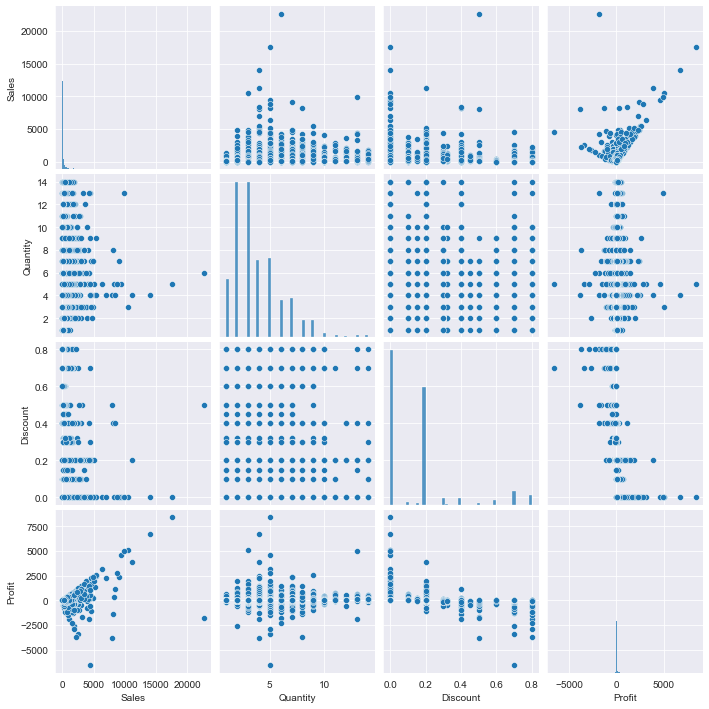

In [13]:
numerical=data.loc[:,['Sales','Quantity','Discount','Profit']]
sns.pairplot(numerical)
plt.show()

<br>

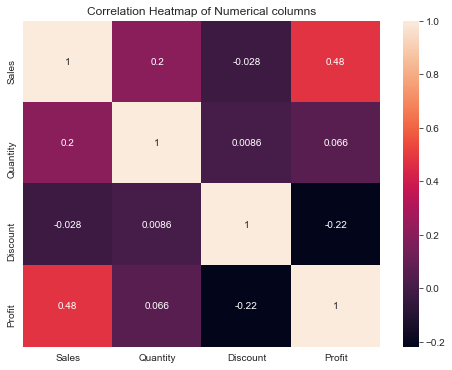

In [14]:
correlation = numerical.corr()
plt.figure(figsize=(8,6))
sns.heatmap(correlation,xticklabels=correlation.columns,yticklabels=correlation.columns,annot=True)
plt.title('Correlation Heatmap of Numerical columns')
plt.show()

From the above heatmap,we see that:

1. Sales and profit are directly proportional
2. Discount and profit are inversely proportional.

We consider the following cases:

<br>

**Case 1: No Discount**

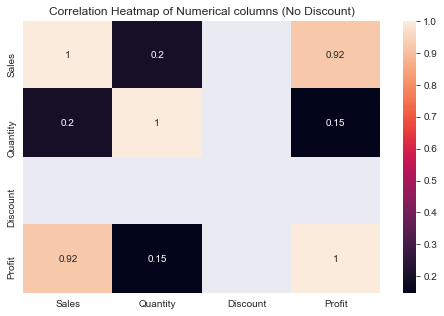

In [15]:
no_disc = numerical[numerical['Discount']==0]
corr1 = no_disc.corr()
plt.figure(figsize=(8,5))
sns.heatmap(corr1,xticklabels=corr1.columns,yticklabels=corr1.columns,annot=True)
plt.title('Correlation Heatmap of Numerical columns (No Discount)')
plt.show()

Here,we see that there is a strong correlation between Sales and Profit (= 0.92).

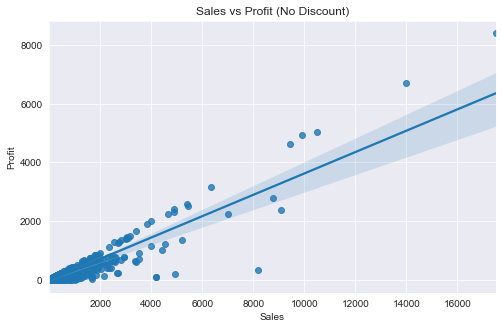

In [16]:
plt.figure(figsize=(8,5))
sns.regplot(x='Sales',y='Profit',data=no_disc)
plt.title('Sales vs Profit (No Discount)')
plt.show()

There is a good positive relation between Sales and Profit, as there should be.

<br>

**Case 2: Discount Given**

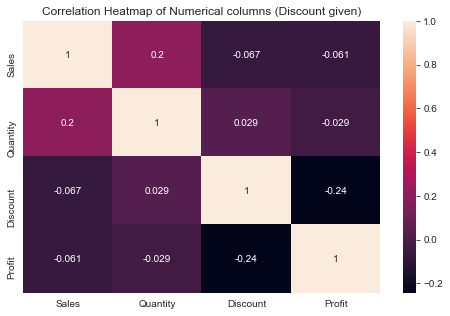

In [17]:
disc = numerical[numerical['Discount']!=0]
corr2 = disc.corr()
plt.figure(figsize=(8,5))
sns.heatmap(corr2,xticklabels=corr2.columns,yticklabels=corr2.columns,annot=True)
plt.title('Correlation Heatmap of Numerical columns (Discount given)')
plt.show()

We see that both Sales and Profit have a negative correlation with Discount. While the Sales one is minimal, the one with Profit is quite significant.

Also, what's noticeable is that the previously positive correlation b/w Sales and Profit has turned negative, when we start giving discounts.

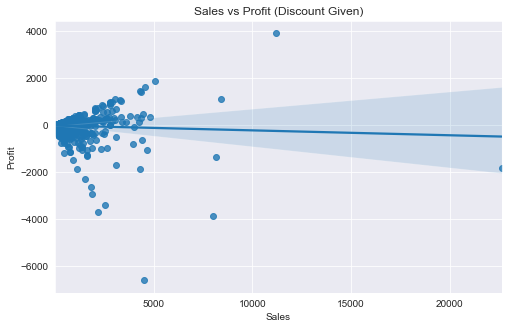

In [18]:
plt.figure(figsize=(8,5))
sns.regplot(x='Sales',y='Profit',data=disc)
plt.title('Sales vs Profit (Discount Given)')
plt.show()

## Discounts are causing losses!!

Now, let's go deeper and look how Discount affects Profit for different types of products.

First, **For different Categories:-**

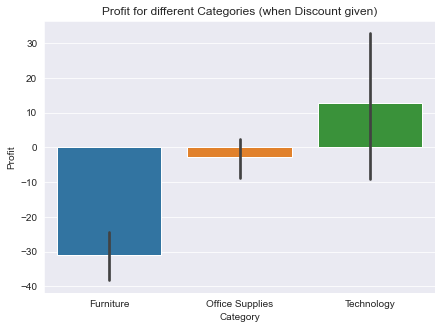

In [19]:
disc = data[data['Discount']!=0]
plt.figure(figsize=(7,5))
sns.barplot(x='Category',y='Profit',data=disc)
plt.title('Profit for different Categories (when Discount given)')
plt.show()

We see that the Profits of Furniture products are hit by discounts the most. Office Supplies also incur loss.

**For different Sub-Categories:-**

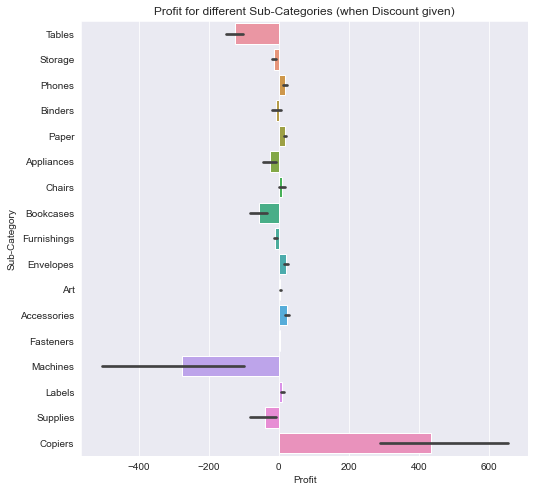

In [20]:
plt.figure(figsize=(8,8))
sns.barplot(y='Sub-Category',x='Profit',data=disc)
plt.title('Profit for different Sub-Categories (when Discount given)')
plt.show()

We see that Copiers collect a high Profit, while Machines suffer heavy losses, due to discounts.

Let's look why is it so.

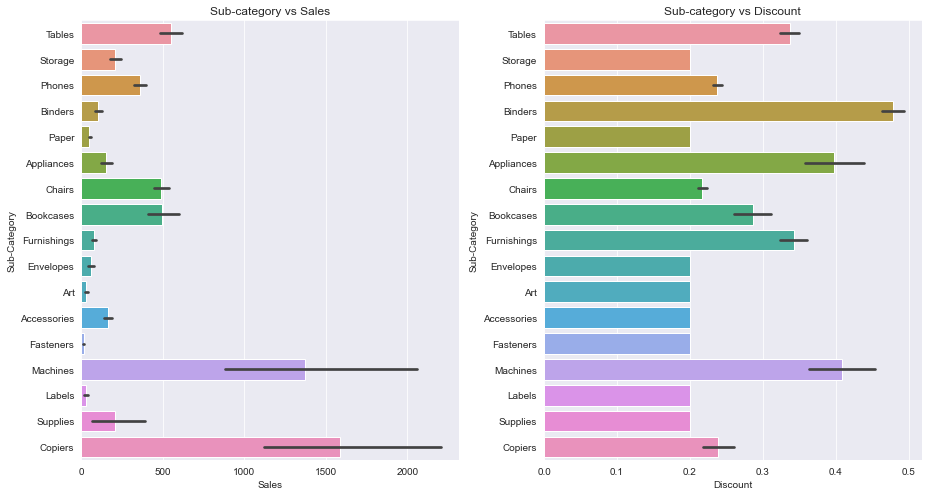

In [21]:
fig,axes = plt.subplots(nrows=1,ncols=2,figsize=(13,7))
sns.barplot(y='Sub-Category',x='Sales',data=disc,ax=axes[0])
axes[0].set_title('Sub-category vs Sales')
sns.barplot(y='Sub-Category',x='Discount',data=disc,ax=axes[1])
axes[1].set_title('Sub-category vs Discount')
plt.tight_layout()

**Insight:-**

As we can see that Copiers and Machines register the highest Sales.

But since the discount given on Copiers is rather low, Copiers' profit don't suffer.

On the other hand, the discount given is quite high(about 40%), so with high sales, the company starts to lose money on the sales of Machines.

Also, we see that the discounts given on Binders and Appliances are also quite high. But since, they don't register very high sales, they don't suffer heavy losses like in the case of Machines.

---
### Analysis by Ship Mode

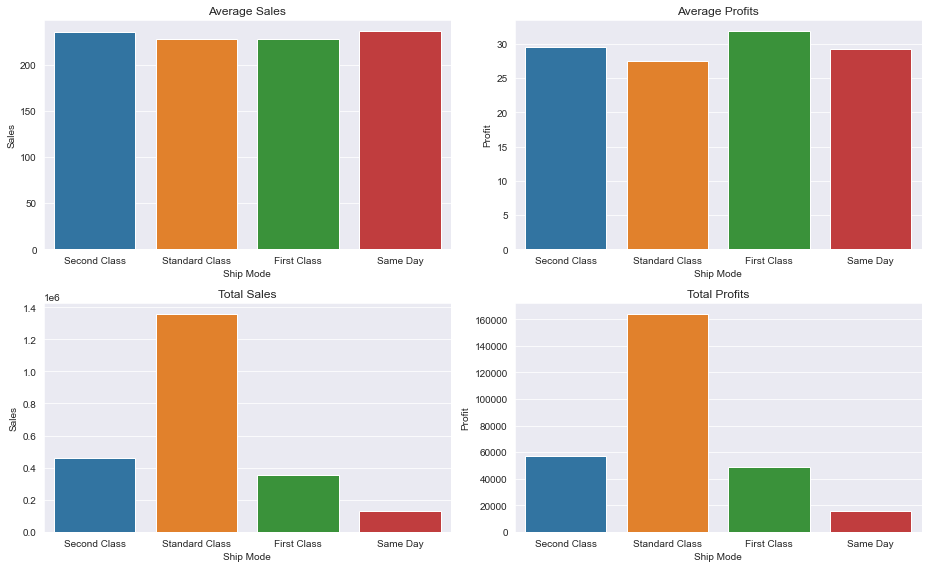

In [22]:
fig,axes = plt.subplots(nrows=2,ncols=2,figsize=(13,8))
sns.barplot(x='Ship Mode',y='Sales',data=data,ax=axes[0,0],ci=None)
axes[0,0].set_title('Average Sales')
sns.barplot(x='Ship Mode',y='Profit',data=data,ax=axes[0,1],ci=None)
axes[0,1].set_title('Average Profits')
sns.barplot(x='Ship Mode',y='Sales',data=data,ax=axes[1,0],ci=None,estimator=sum)
axes[1,0].set_title('Total Sales')
sns.barplot(x='Ship Mode',y='Profit',data=data,ax=axes[1,1],ci=None,estimator=sum)
axes[1,1].set_title('Total Profits')
plt.tight_layout()
plt.show()

**Insight: -**
Most of our Sales and Profit come from the Standard Class shipping. However, Ship Mode doesn't really make a difference on our Profits, as all modes give nearly the same average profit.

---
### Analysis by Region

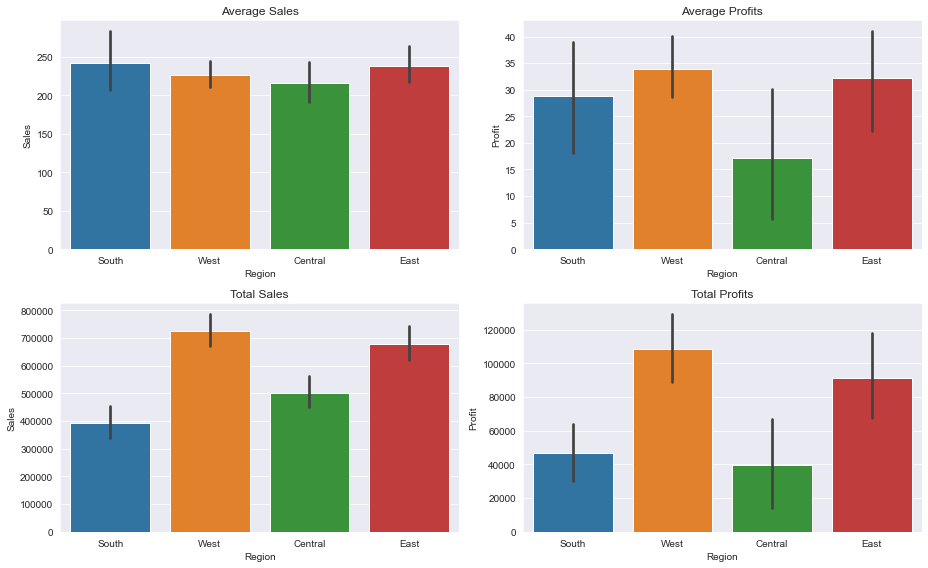

In [23]:
fig,axes = plt.subplots(nrows=2,ncols=2,figsize=(13,8))
sns.barplot(x='Region',y='Sales',data=data,ax=axes[0,0],)
axes[0,0].set_title('Average Sales')
sns.barplot(x='Region',y='Profit',data=data,ax=axes[0,1])
axes[0,1].set_title('Average Profits')
sns.barplot(x='Region',y='Sales',data=data,ax=axes[1,0],estimator=sum)
axes[1,0].set_title('Total Sales')
sns.barplot(x='Region',y='Profit',data=data,ax=axes[1,1],estimator=sum)
axes[1,1].set_title('Total Profits')
plt.tight_layout()
plt.show()

Total Profit in the South Region is low. But this is because the sales there are low too. Also, as we can see the Average Profit is still good.


However, Both Total and Average Profits are low in the Central region, even though the sales there are decent. That's weird.

Let's look into it closely.

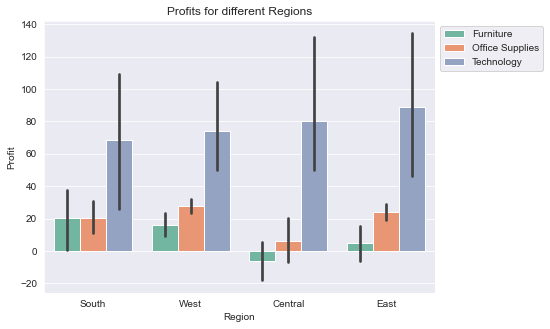

In [24]:
plt.figure(figsize=(7,5))
sns.barplot(x='Region',y='Profit',hue='Category',data=data,palette='Set2')
plt.title('Profits for different Regions')
plt.legend(bbox_to_anchor=(1, 1), loc=2)
plt.show()

**Insight:-** Furniture products are the only ones incurring losses, and that too only in the Central region.

Let's further look into these losses.

In [25]:
central = data[data['Region']=='Central']
central_furniture = central[central['Category']=='Furniture']

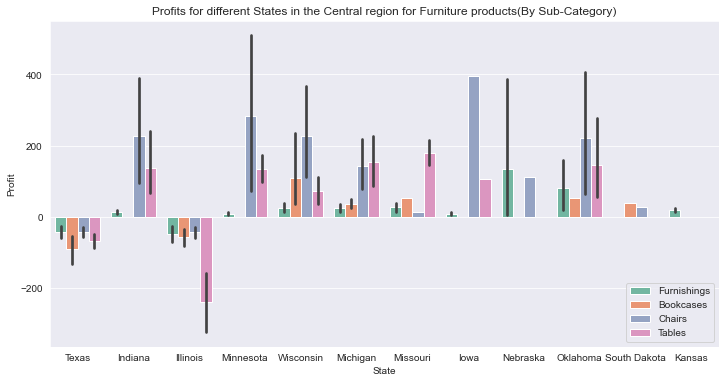

In [26]:
plt.figure(figsize=(12,6))
sns.barplot(x='State',y='Profit',hue='Sub-Category',data=central_furniture,palette='Set2')
plt.title('Profits for different States in the Central region for Furniture products(By Sub-Category)')
plt.legend(loc='lower right')
plt.show()

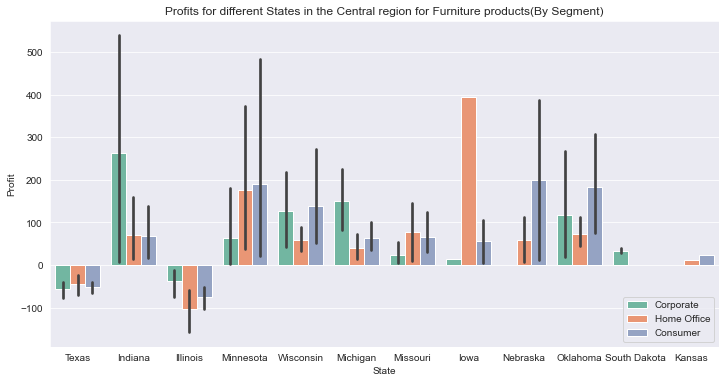

In [27]:
plt.figure(figsize=(12,6))
sns.barplot(x='State',y='Profit',hue='Segment',data=central_furniture,palette='Set2')
plt.title('Profits for different States in the Central region for Furniture products(By Segment)')
plt.legend(loc='lower right')
plt.show()

**Insight:-** Texas and Illinois are the only ones incurring losses in the Central region for Furniture products.

But what are they doing wrong?

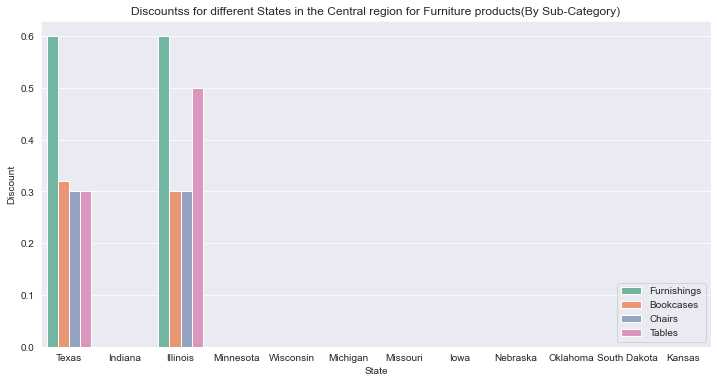

In [28]:
plt.figure(figsize=(12,6))
sns.barplot(x='State',y='Discount',hue='Sub-Category',data=central_furniture,palette='Set2')
plt.title('Discountss for different States in the Central region for Furniture products(By Sub-Category)')
plt.legend(loc='lower right')
plt.show()

That's it! The reason for their losses is the huge discount they give on such products.

- 60% on Furnishings in both Texas and Illinois!!
- 50% on Tables in Illinois!

**Are these discounts even worth giving?**

Are they increasing Sales?

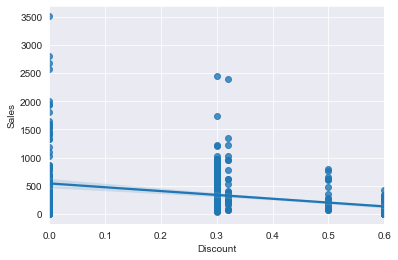

In [29]:
sns.regplot(x='Discount',y='Sales',data=central_furniture)
plt.show()

The answer is NO.

---
### Analysis by Category

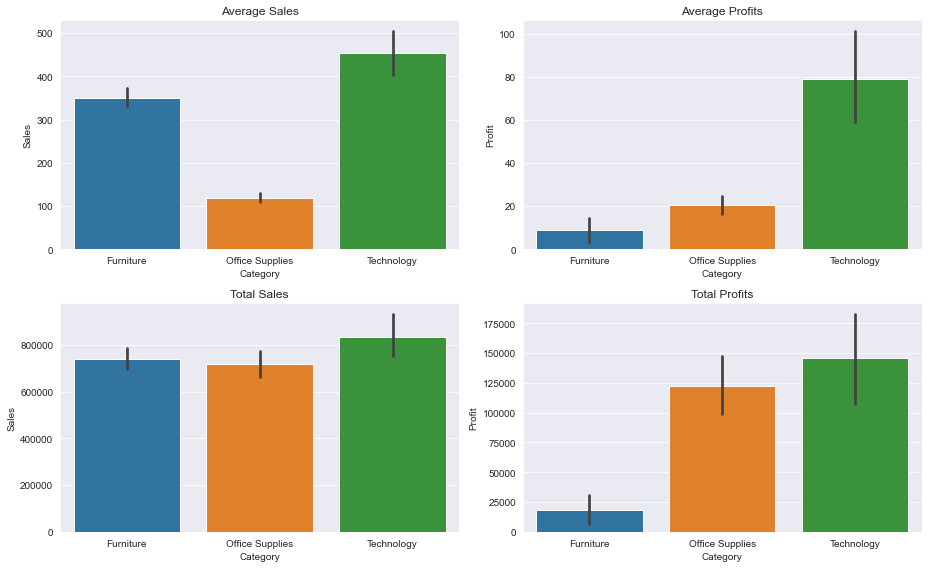

In [30]:
fig,axes = plt.subplots(nrows=2,ncols=2,figsize=(13,8))
sns.barplot(x='Category',y='Sales',data=data,ax=axes[0,0],)
axes[0,0].set_title('Average Sales')
sns.barplot(x='Category',y='Profit',data=data,ax=axes[0,1])
axes[0,1].set_title('Average Profits')
sns.barplot(x='Category',y='Sales',data=data,ax=axes[1,0],estimator=sum)
axes[1,0].set_title('Total Sales')
sns.barplot(x='Category',y='Profit',data=data,ax=axes[1,1],estimator=sum)
axes[1,1].set_title('Total Profits')
plt.tight_layout()
plt.show()

**Insight:-** Sales and Profits are high on an average for Technology products.

Let's analyze further.

In [31]:
technology = data[data['Category']=='Technology']

In [32]:
avg_profits_by_state_in_tech =  technology.groupby('State').mean()['Profit']
tot_profits_by_state_in_tech =  technology.groupby('State').sum()['Profit']

In [33]:
high_avg_profits = avg_profits_by_state_in_tech.sort_values(ascending=False).head()
low_avg_profits = avg_profits_by_state_in_tech.sort_values().head()
high_tot_profits = tot_profits_by_state_in_tech.sort_values(ascending=False).head()
low_tot_profits = tot_profits_by_state_in_tech.sort_values().head()

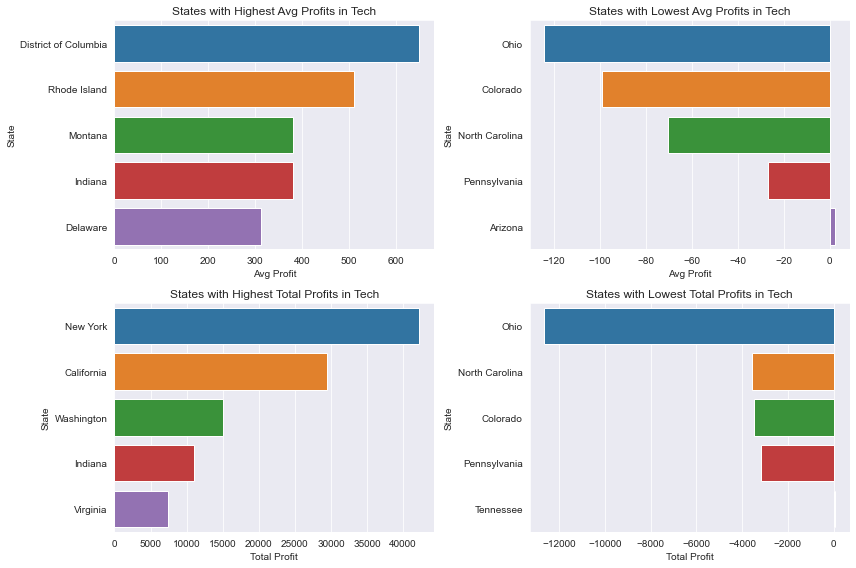

In [34]:
fig,axes = plt.subplots(nrows=2,ncols=2,figsize=(12,8))
sns.barplot(y=high_avg_profits.index,x=high_avg_profits.values,ax=axes[0,0])
axes[0,0].set_title('States with Highest Avg Profits in Tech')
axes[0,0].set_xlabel('Avg Profit')
sns.barplot(y=low_avg_profits.index,x=low_avg_profits.values,ax=axes[0,1])
axes[0,1].set_title('States with Lowest Avg Profits in Tech')
axes[0,1].set_xlabel('Avg Profit')
sns.barplot(y=high_tot_profits.index,x=high_tot_profits.values,ax=axes[1,0])
axes[1,0].set_title('States with Highest Total Profits in Tech')
axes[1,0].set_xlabel('Total Profit')
sns.barplot(y=low_tot_profits.index,x=low_tot_profits.values,ax=axes[1,1])
axes[1,1].set_title('States with Lowest Total Profits in Tech')
axes[1,1].set_xlabel('Total Profit')
plt.tight_layout()
plt.show()

**States with Highest Avg Profits:-** District of Columbia, Rhode Island

**States with Lowest Avg Profits:-** Ohio, Colorado

**States with Highest Total Profits:-** New York, California

**States with Lowest Total Profits:-** Ohio, North Carolina

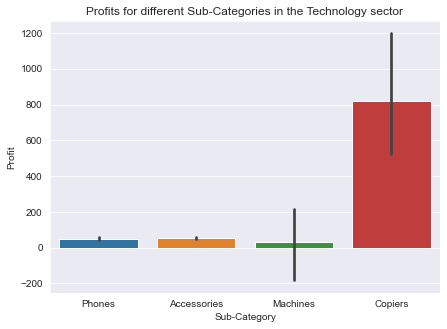

In [35]:
plt.figure(figsize=(7,5))
sns.barplot(x='Sub-Category',y='Profit',data=technology)
plt.title('Profits for different Sub-Categories in the Technology sector')
plt.show()

**Insight:-** Copiers are the most profitable product in the most profitable category.

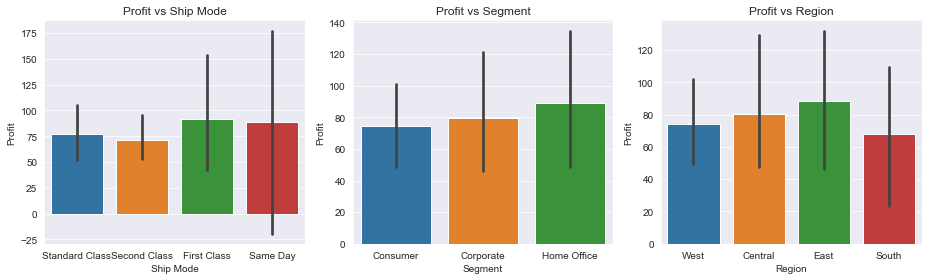

In [36]:
fig,axes = plt.subplots(1,3,figsize=(13,4))
sns.barplot(x='Ship Mode',y='Profit',data=technology,ax=axes[0])
axes[0].set_title('Profit vs Ship Mode')
sns.barplot(x='Segment',y='Profit',data=technology,ax=axes[1])
axes[1].set_title('Profit vs Segment')
sns.barplot(x='Region',y='Profit',data=technology,ax=axes[2])
axes[2].set_title('Profit vs Region')
plt.tight_layout()
plt.show()

The Profits in the Technology sector don't depend on the type of Shipping, the Segment, or the Region.

---
---

# Insights

### 1. Analysis by State

1. California and New York are the states bringing in the highest Sales and Profits, and that too by some margin.
2. States like North Dakota and West Virginia record the lowest sales.
3. States like Texas and Ohio suffer the heaviest losses.

### 2. Analysis by City

1. New York City, Los Angeles, Seattle register the highest Sales and Profits.
2. Abilene and Elyria have the lowest sales.
3. Philadelphia and Houston suffer the biggest losses.

### 3. Analysis by Segment

1. The Total Sales and Profit in Consumer segment is large. But, the Average Profit is the lowest in this Segment.
2. The Average Sales are almost same for all Segments.

### 4. Analysis by Discount given

1. Discount and Profit are negatively correlated. Giving higher discounts result in loss for the company.
2. Furniture products are hit the most by discounts.
3. Machines provide the most loss, since the discount given on them is quite large.

### 5. Analysis by Mode of Shipping

1. Most of our Sales and Profit come from the Standard Class shipping.
2. Shipping Mode doesn't really make a difference on our Profits. All modes give nearly the same average profit.

### 6. Analysis by Region

1. Profits are low in the Central region, even though the sales there are decent.
2. Furniture products are the only ones incurring losses in the Central region.
3. Texas and Illinois are the only ones incurring losses in the Central region for Furniture products.
4. The reason for their losses is the huge discount they give on such products, which is not even increasing sales.

### 7. Analysis by Category

1. Sales and Profits are the highest for Technology products.

2. States like District of Columbia and Rhode Island bring in higher profits on an average, for Technology products.

3. Ohio and Technology products don't fit well.

4. Copiers are the most profitable product in the Technology sector.

5. The Profits in the Technology sector don't depend on the type of Shipping, the Segment, or the Region.

---
---

# Derivations

1. Giving large discount on products may increase sales, but the Profit starts going down.
2. Stop giving huge discounts on Machines and Furniture products. Profits are taking a serious hit because of them.
3. Technology products do well. So, keep promoting their sales, especially in states like District of Columbia and Rhode Island where they bring in more profit.
4. Take steps to increase the sales of Office supplies.
5. Promote sales(especially of Technology products) in Ohio.
6. Copiers are the company's most profitable products. So, promote their sales as much as possible to increase profit.
7. New York and California are very good for business. So, sell more and more to these states to increase profits.
8. Focus on promoting sales in West Virginia and North Dakota.
9. To rise the profits, Consumer Segment products should me sold more.
10. Reduce the losses incurred in Texas and Illinois, by controlling the huge discounts these states are giving on some products(especially Furniture products).